### Para este exemplo, usaremos o dataset Titanic do Kaggle. Iremos prever uma classificação - sobreviventes e não sobreviventes

In [1]:
#Os dados já são divididos em dados de treino e teste
treino <- read.csv('datasets/titanic-train.csv')

In [2]:
head(treino)
dim(treino)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


[1] 891  12

### Sobre as variáveis
- PassengerId: Um identificador único atribuído a cada passageiro.
- Survived: Indica se o passageiro sobreviveu ou não. Possui valores binários, como 0 para "não sobreviveu" e 1 para "sobreviveu".
- Pclass: Classe do bilhete do passageiro. Pode ter valores como 1, 2 ou 3, indicando a classe do bilhete (primeira, segunda ou terceira classe).
- Name: O nome do passageiro.
- Sex: O sexo do passageiro.
- Age: A idade do passageiro.
- SibSp: Número de irmãos/cônjuges a bordo do Titanic.
- Parch: Número de pais/filhos a bordo do Titanic.
- Ticket: Número do bilhete do passageiro.
- Fare: A tarifa paga pelo passageiro.
- Cabin: Número da cabine do passageiro. 
- Embarked: Porto de embarque do passageiro. Pode ter valores como "C" (Cherbourg), "Q" (Queenstown) ou "S" (Southampton).

In [3]:
str(treino)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


In [4]:
data.frame(colSums(is.na(treino)))

,colSums.is.na.treino..
,<dbl>
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0


In [5]:
summary(treino$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

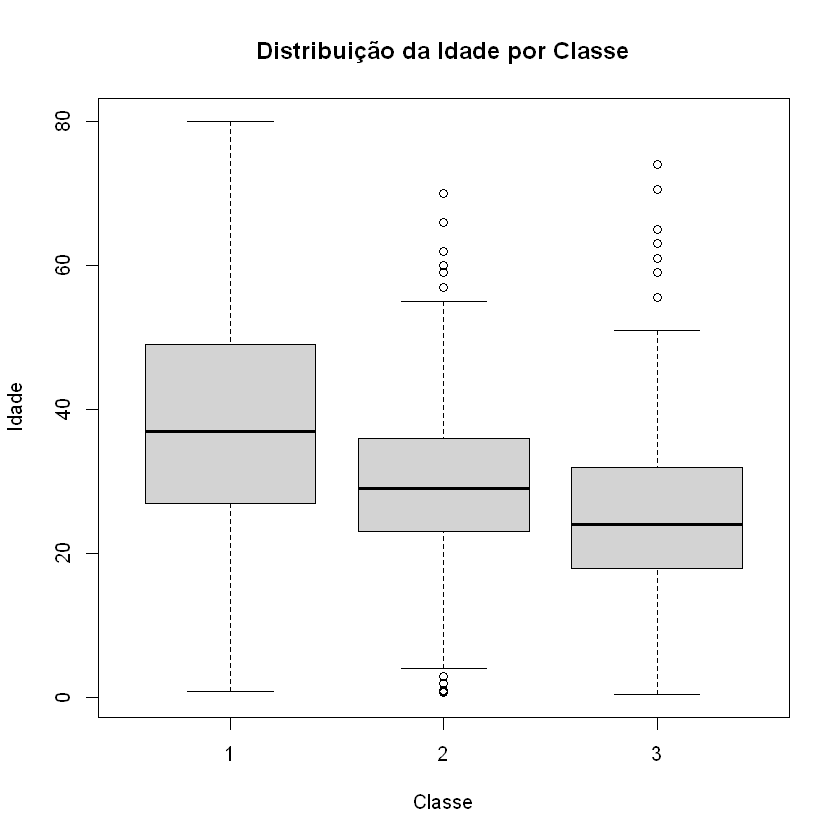

In [6]:
# Criar um boxplot para verificar a idade por classe
boxplot(Age ~ Pclass, data = treino, 
        main = "Distribuição da Idade por Classe",
        xlab = "Classe",
        ylab = "Idade")

In [7]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [8]:
# Calculando a média e a mediana da idade por classe
resultados <- treino %>%
  group_by(Pclass) %>%
  summarise(
    media_idade = mean(Age, na.rm = TRUE),
    mediana_idade = median(Age, na.rm = TRUE)
  )
(resultados)

Pclass,media_idade,mediana_idade
<int>,<dbl>,<dbl>
1,38.23344,37
2,29.87763,29
3,25.14062,24


In [9]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


Warning message:
"Removed 177 rows containing non-finite values (`stat_boxplot()`)."


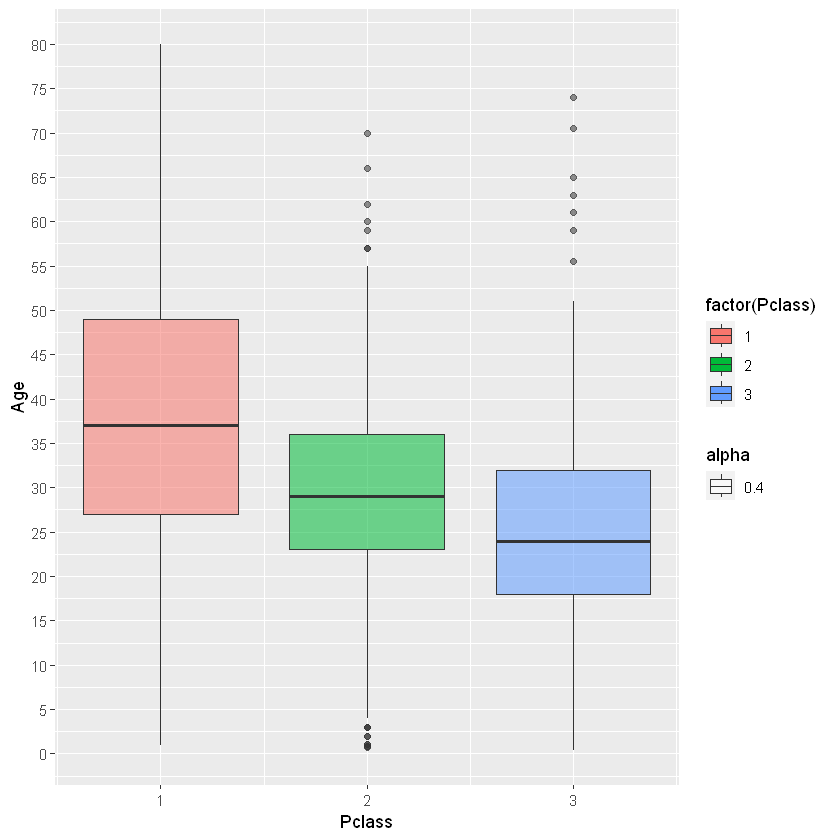

In [10]:
#Gráfico com uma estética melhor
pl <- ggplot(treino, aes(Pclass,Age)) + geom_boxplot(aes(group = Pclass, fill = factor(Pclass), alpha = 0.4)) 
pl + scale_y_continuous(breaks = seq(min(0), max(80), by = 5))

In [11]:
# Vimos que os passageiros mais ricos, nas classes mais altas, tendem a ser mais velhos. 
#Vamos mapear os valores ausentes por classe e substitui-los pela média da idade de cada classe

Corrigir_idade <- function(x) {
  treino$Age <- ifelse(is.na(treino$Age), 
                       ifelse(treino$Pclass == 1, 38,
                              ifelse(treino$Pclass == 2, 30, 24)), 
                       treino$Age)
  return(treino)
}

In [12]:
treino_corrigido <- Corrigir_idade(treino)

In [13]:
colSums(is.na(treino_corrigido))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0           0 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0           0           0

In [14]:
head(treino_corrigido)
dim(treino_corrigido)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,24,0,0,330877,8.4583,,Q


[1] 891  12

In [15]:
#Numero de pessoas por classe
Pessoas_classe <-data.frame(table(treino_corrigido$Pclass))
colnames(Pessoas_classe ) <- c('Classe', 'Contagem_Classe')

In [16]:
Pessoas_classe

Classe,Contagem_Classe
<fct>,<int>
1,216
2,184
3,491


In [17]:
#Numero de sobreviventes
(table(treino_corrigido$Survived))


  0   1 
549 342 

In [18]:
# Calculando o número de sobreviventes por classe
sobreviventes_por_classe <- data.frame(tapply(treino_corrigido$Survived, treino_corrigido$Pclass, sum))
sobreviventes_por_classe

,tapply.treino_corrigido.Survived..treino_corrigido.Pclass..sum.
,<int>
1,136
2,87
3,119


In [19]:
#Adicionando coluna para Classe 1,2,3
sobreviventes_por_classe$Classe <- c(1,2,3)
#Renomeando colunas
colnames(sobreviventes_por_classe)[1] <- 'Contagem_Sobreviventes'
sobreviventes_por_classe

,Contagem_Sobreviventes,Classe
,<int>,<dbl>
1,136,1
2,87,2
3,119,3


In [20]:
#Combinando os Df por classe 
sobreviventes <-merge(Pessoas_classe, sobreviventes_por_classe, by = 'Classe')
sobreviventes

Classe,Contagem_Classe,Contagem_Sobreviventes
<fct>,<int>,<int>
1,216,136
2,184,87
3,491,119


In [21]:
#Alterando a primeira coluna para caracter para fazer atualizações
sobreviventes$Classe <- as.character(sobreviventes$Classe)
sobreviventes

Classe,Contagem_Classe,Contagem_Sobreviventes
<chr>,<int>,<int>
1,216,136
2,184,87
3,491,119


In [22]:
#Somando o número total de passageiros
total_contagem_classe <- sum(sobreviventes$Contagem_Classe)
total_contagem_sobreviventes <- sum(sobreviventes$Contagem_Sobreviventes)
#Criando uma linha para ser adicionado ao final do DF
nova_linha <- c('Total_coluna', total_contagem_classe, total_contagem_sobreviventes)
nova_linha

[1] "Total_coluna" "891"          "342"

In [23]:
#Combinando
sobreviventes <- rbind(sobreviventes,nova_linha)

In [24]:
sobreviventes$Contagem_Classe <- as.numeric(sobreviventes$Contagem_Classe)
sobreviventes$Contagem_Sobreviventes <- as.numeric(sobreviventes$Contagem_Sobreviventes)
sobreviventes

Classe,Contagem_Classe,Contagem_Sobreviventes
<chr>,<dbl>,<dbl>
1,216,136
2,184,87
3,491,119
Total_coluna,891,342


In [25]:
# Loop para realizar as divisões 
Percentual_por_classe <- length(sobreviventes$Contagem_Classe)
for (i in 1:(length(sobreviventes$Contagem_Classe) - 1)) {
  Percentual_por_classe[i] <- round((sobreviventes$Contagem_Classe[i] / 891) * 100, 2)}

In [26]:
Percentual_por_classe <- data.frame(Percentual_por_classe)
Percentual_por_classe

Percentual_por_classe
<dbl>
24.24
20.65
55.11


In [27]:
# Loop para realizar as divisões 
Percentual_sobreviventes_sobreviventes <- length(sobreviventes$Contagem_Sobreviventes)
for (i in 1:(length(sobreviventes$Contagem_Sobreviventes) - 1)) {
  Percentual_sobreviventes_sobreviventes[i] <- round((sobreviventes$Contagem_Sobreviventes[i] / 342) * 100, 2)}

In [28]:
Percentual_sobreviventes_sobreviventes <-data.frame(Percentual_sobreviventes_sobreviventes)
Percentual_sobreviventes_sobreviventes

Percentual_sobreviventes_sobreviventes
<dbl>
39.77
25.44
34.80


In [29]:
Percentual_sobreviventes_classe <- length(sobreviventes$Contagem_Sobreviventes)
for (i in 1:(length(sobreviventes$Contagem_Sobreviventes) - 1)) {
  Percentual_sobreviventes_classe[i] <- round((sobreviventes$Contagem_Sobreviventes[i] / sobreviventes$Contagem_Classe[i]) * 
                                              100, 2)}

In [30]:
Percentual_sobreviventes_classe <-data.frame(Percentual_sobreviventes_classe )
Percentual_sobreviventes_classe

Percentual_sobreviventes_classe
<dbl>
62.96
47.28
24.24


In [31]:
Percentual_geral <-cbind(Percentual_por_classe,Percentual_sobreviventes_sobreviventes,Percentual_sobreviventes_classe)
Percentual_geral 

Percentual_por_classe,Percentual_sobreviventes_sobreviventes,Percentual_sobreviventes_classe
<dbl>,<dbl>,<dbl>
24.24,39.77,62.96
20.65,25.44,47.28
55.11,34.80,24.24


In [32]:
#Criando uma linha para legenda e adequação para combinar os dados pelo cbind.
linha <- c('% classe pelo n° total', '% sobreviventes pelo nº de sobrev.', '% sobrev. pelo nº de p. em cada classe')

In [33]:
Percentual_geral <-rbind(Percentual_geral,linha)
Percentual_geral

Percentual_por_classe,Percentual_sobreviventes_sobreviventes,Percentual_sobreviventes_classe
<chr>,<chr>,<chr>
24.24,39.77,62.96
20.65,25.44,47.28
55.11,34.8,24.24
% classe pelo n° total,% sobreviventes pelo nº de sobrev.,% sobrev. pelo nº de p. em cada classe


In [34]:
#Combinando os dados
dados_gerais <-cbind(sobreviventes,Percentual_geral)
dados_gerais

Classe,Contagem_Classe,Contagem_Sobreviventes,Percentual_por_classe,Percentual_sobreviventes_sobreviventes,Percentual_sobreviventes_classe
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,216,136,24.24,39.77,62.96
2,184,87,20.65,25.44,47.28
3,491,119,55.11,34.8,24.24
Total_coluna,891,342,% classe pelo n° total,% sobreviventes pelo nº de sobrev.,% sobrev. pelo nº de p. em cada classe


### Analisando os dados, inicialmente pode-se perceber uma homogeneidade nas porcentagens de sobreviventes em relação ao total de sobreviventes entre as classes. No entanto, ao calcular a porcentagem de sobreviventes em relação ao número total de passageiros por classe, torna-se nitidamente aparente que a maioria dos sobreviventes pertencia à primeira classe. Esse resultado sugere uma disparidade significativa nas taxas de sobrevivência entre as diferentes classes, destacando a possibilidade de que medidas de priorização ou outras influências tenham desempenhado um papel crucial durante o naufrágio do Titanic.

In [35]:
# Calculando o número de sobreviventes por sexo
sobreviventes_por_sexo <- data.frame(tapply(treino_corrigido$Survived, treino_corrigido$Sex, sum))
colnames(sobreviventes_por_sexo)[1] <- 'Sobreviventes_por_sexo'
sobreviventes_por_sexo

,Sobreviventes_por_sexo
,<int>
female,233
male,109


### Também podemos observar que a maioria dos sobreviventes era do sexo feminino.  Essa observação pode indicar a presença de uma preferência ou política de priorização para colocar mulheres nos botes salva-vidas durante a evacuação do navio.

## Construindo o Modelo

In [36]:
head(treino_corrigido)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,24,0,0,330877,8.4583,,Q


In [37]:
library(dplyr)

In [38]:
#Removendo variáveis que não serão usadas para treinar o modelo
treino_corrigido <-select(treino_corrigido, -PassengerId, -Name, -Ticket, -Cabin)

In [39]:
head(treino_corrigido)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,0,3,male,22,1,0,7.2500,S
2,1,1,female,38,1,0,71.2833,C
3,1,3,female,26,0,0,7.9250,S
4,1,1,female,35,1,0,53.1000,S
5,0,3,male,35,0,0,8.0500,S
6,0,3,male,24,0,0,8.4583,Q


In [40]:
# Treinando o modelo e depois faça as previsões
modelo1 <- glm(Survived ~ . , family = binomial(link = 'logit'), data = treino_corrigido)

**family:** Este argumento especifica a distribuição da família a ser usada no modelo. Em um modelo de regressão logística, você está lidando com uma variável de resposta binária (duas categorias), então a distribuição binomial é apropriada.  
**binomial:** Este é o tipo de distribuição usado para modelar variáveis binárias.  
**link:** Este argumento especifica a função de ligação utilizada para relacionar a média da distribuição à combinação linear das variáveis independentes. A função de ligação logística ('logit') é comumente usada em regressão logística. A função logística transforma valores lineares em uma escala entre 0 e 1, o que é crucial para interpretar os resultados como probabilidades.

In [41]:
summary(modelo1)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = treino_corrigido)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7092  -0.5836  -0.4083   0.6165   2.4879  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.859543 608.330947   0.029  0.97658    
Pclass       -1.186613   0.149950  -7.913 2.50e-15 ***
Sexmale      -2.726567   0.201742 -13.515  < 2e-16 ***
Age          -0.043327   0.008200  -5.284 1.26e-07 ***
SibSp        -0.340934   0.110035  -3.098  0.00195 ** 
Parch        -0.087899   0.119681  -0.734  0.46268    
Fare          0.001718   0.002370   0.725  0.46853    
EmbarkedC   -12.295404 608.330727  -0.020  0.98387    
EmbarkedQ   -12.413431 608.330782  -0.020  0.98372    
EmbarkedS   -12.685786 608.330710  -0.021  0.98336    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.66  on 890  degr

### Com base nos valores de p, podemos inferir que as variáveis Pclass, Sex e Age são estatisticamente significativas no modelo, e isso sugere que essas variáveis são mais relevantes para explicar a variabilidade na variável dependente em comparação com variáveis que não são estatisticamente significativas. Portanto, neste caso:

- A variável Pclass, com um valor de p muito pequeno (2.50e-15), é estatisticamente significativa.
- A variável Sex, com um valor de p ainda menor (< 2e-16), é estatisticamente significativa.
- A variável Age, com um valor de p de 1.26e-07, também é estatisticamente significativa.

In [42]:
#Carregando o dataset dados testes
#O dataset não apresenta a coluna survived, justamente para previsão
dados_testes <- read.csv('datasets/titanic-test.csv')
head(dados_testes)
dim(dados_testes)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,,S
3,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,,Q
4,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,,S
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,,S
6,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,,S


[1] 418  11

In [43]:
#Toda e qualquer transformação aplicada aos dados de treino deve ser aplicada aos dados de teste e novos dados!
#Removendo as mesmas colunas
dados_testes <-select(dados_testes, -PassengerId, -Name, -Ticket, -Cabin)

In [44]:
#Verificando dados ausentes
colSums(is.na(dados_testes))

Pclass      Sex      Age    SibSp    Parch     Fare Embarked 
       0        0       86        0        0        1        0

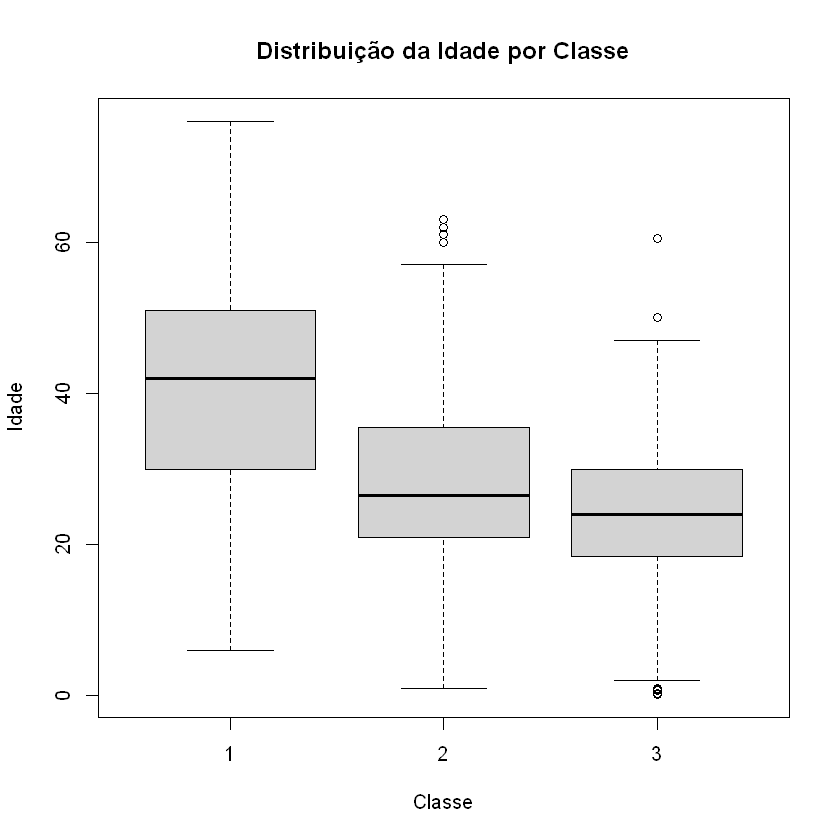

In [45]:
# Criar um boxplot para verificar a idade por classe
boxplot(Age ~ Pclass, data = dados_testes, 
        main = "Distribuição da Idade por Classe",
        xlab = "Classe",
        ylab = "Idade")

In [46]:
# Calculando a média e a mediana da idade por classe
resultados <- dados_testes %>%
  group_by(Pclass) %>%
  summarise(
    media_idade = mean(Age, na.rm = TRUE),
    mediana_idade = median(Age, na.rm = TRUE)
  )
(resultados)

Pclass,media_idade,mediana_idade
<int>,<dbl>,<dbl>
1,40.91837,42.0
2,28.77750,26.5
3,24.02795,24.0


In [47]:
# Novamente percebemos que os passageiros da primeira classe tendem a ser mais velhos. 
#Vamos mapear os valores ausentes por classe e substitui-los pela média da idade de cada classe

Corrigir_idade_a <- function(x) {
  dados_testes$Age <- ifelse(is.na(dados_testes$Age), 
                       ifelse(dados_testes$Pclass == 1, 41,
                              ifelse(dados_testes$Pclass == 2, 29, 24)), 
                       dados_testes$Age)
  return(dados_testes)
}

In [48]:
dados_testes_corrigido <-Corrigir_idade_a(dados_testes)

In [49]:
colSums(is.na(dados_testes_corrigido))

Pclass      Sex      Age    SibSp    Parch     Fare Embarked 
       0        0        0        0        0        1        0

In [50]:
head(dados_testes_corrigido,10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>
1,3,male,34.5,0,0,7.8292,Q
2,3,female,47.0,1,0,7.0000,S
3,2,male,62.0,0,0,9.6875,Q
4,3,male,27.0,0,0,8.6625,S
5,3,female,22.0,1,1,12.2875,S
6,3,male,14.0,0,0,9.2250,S
7,3,female,30.0,0,0,7.6292,Q
8,2,male,26.0,1,1,29.0000,S
9,3,female,18.0,0,0,7.2292,C


In [51]:
# Fazendo previsões no conjunto de teste
previsoes <- predict(modelo1, newdata = dados_testes_corrigido, type = 'response')

**type = 'response':** Este argumento especifica o tipo de previsões desejado. No contexto de uma regressão logística, 'response' significa que você está interessado nas probabilidades previstas.

In [52]:
previsoes_sobreviventes <- ifelse(previsoes > 0.5, 'sim', 'não') #cutoff
head(previsoes_sobreviventes,20)
#Se a probabilidade for maior que 0.5, passageiro sobreviveu

1     2     3     4     5     6     7     8     9    10    11    12    13 
"não" "não" "não" "não" "sim" "não" "sim" "não" "sim" "não" "não" "não" "sim" 
   14    15    16    17    18    19    20 
"não" "sim" "sim" "não" "não" "sim" "sim"

### Fazendo outro modelo para testar acurácia no dados de treino.

In [53]:
# Fazendo as previsoes nos dados de treino
library(caTools)
set.seed(101)

Warning message:
"package 'caTools' was built under R version 4.2.3"


In [54]:
# Split dos dados
split = sample.split(treino_corrigido$Survived, SplitRatio = 0.70)

In [55]:
# Datasets de treino e de teste
dados_treino_final = subset(treino_corrigido, split == TRUE)
dados_teste_final = subset(treino_corrigido, split == FALSE)

In [56]:
dim(dados_treino_final)
dim(dados_teste_final)

[1] 623   8

[1] 268   8

In [57]:
# Treinando o novo modelo
modelo2 <- glm(Survived ~ . , family = binomial(link = 'logit'), data = dados_treino_final)

In [58]:
summary(modelo2)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = dados_treino_final)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7816  -0.5770  -0.4062   0.6509   2.4956  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  16.064635 535.411466   0.030  0.97606    
Pclass       -1.133155   0.180074  -6.293 3.12e-10 ***
Sexmale      -2.698701   0.239872 -11.251  < 2e-16 ***
Age          -0.041406   0.009575  -4.325 1.53e-05 ***
SibSp        -0.334935   0.128546  -2.606  0.00917 ** 
Parch         0.066127   0.146064   0.453  0.65075    
Fare          0.002600   0.002833   0.918  0.35881    
EmbarkedC   -10.719197 535.411280  -0.020  0.98403    
EmbarkedQ   -10.721043 535.411368  -0.020  0.98402    
EmbarkedS   -11.192632 535.411256  -0.021  0.98332    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 829.6  on 622  degr

In [59]:
# Fazendo previsões no conjunto de teste
previsoes <- predict(modelo1, newdata = dados_teste_final, type = 'response')

In [60]:
head(previsoes)

4         6        12        21        22        24 
0.9021210 0.1340519 0.8205120 0.1981666 0.2015229 0.5270807

In [61]:
previsoes_sobreviventes <- ifelse(previsoes > 0.5, 1, 0) #cutoff:1 sobreviveu, 0: não sobreviveu
head(previsoes_sobreviventes)

4  6 12 21 22 24 
 1  0  1  0  0  1

In [62]:
# Conseguimos quase 80% de acurácia
Acuracia <- mean(previsoes_sobreviventes != dados_teste_final$Survived)
print(paste('Acuracia', 1-Acuracia))

[1] "Acuracia 0.794776119402985"


In [63]:
# Criando a confusion matrix
table(dados_teste_final$Survived, previsoes_sobreviventes)

   previsoes_sobreviventes
      0   1
  0 141  24
  1  31  72

### Na matriz de confusão devemos olhar para diagonal principal, desta forma:
- Isso significa que o modelo corretamente previu 72 instâncias como positivas, e essas instâncias realmente pertenciam à classe positiva (1). 72 passageiros realmente sobreviveram;
- O modelo corretamente previu 141 instâncias como negativas, e essas instâncias realmente pertenciam à classe negativa (0). 141 passageiros não sobreviveram;
- O modelo erroneamente previu 31 instâncias como negativas, mas essas instâncias realmente pertenciam à classe positiva (1).
- O modelo erroneamente previu 24 instâncias como positivas, mas essas instâncias realmente pertenciam à classe negativa (0).

In [64]:
#Também  podemos avaliar o modelo preditivo com o pacote caret: matriz de confusão e acurácia.
library(caret)

Warning message:
"package 'caret' was built under R version 4.2.3"
Carregando pacotes exigidos: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"


In [65]:
# Matriz de confusão
matriz_confusao <- confusionMatrix(as.factor(previsoes_sobreviventes), as.factor(dados_teste_final$Survived))
print(matriz_confusao)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 141  31
         1  24  72
                                          
               Accuracy : 0.7948          
                 95% CI : (0.7414, 0.8415)
    No Information Rate : 0.6157          
    P-Value [Acc > NIR] : 2.35e-10        
                                          
                  Kappa : 0.5607          
                                          
 Mcnemar's Test P-Value : 0.4185          
                                          
            Sensitivity : 0.8545          
            Specificity : 0.6990          
         Pos Pred Value : 0.8198          
         Neg Pred Value : 0.7500          
             Prevalence : 0.6157          
         Detection Rate : 0.5261          
   Detection Prevalence : 0.6418          
      Balanced Accuracy : 0.7768          
                                          
       'Positive' Class : 0               
                              